In [281]:
import pandas as pd
import numpy as np
file1 = pd.read_csv('file1.txt', sep=";")
file1['Timestamp'] = file1['Timestamp'].astype('datetime64[s]')

file2 = pd.read_csv('file2.txt', sep=";")
file2['Timestamp'] = file2['Timestamp'].astype('datetime64[s]')

file3 = pd.read_csv('file3.txt', sep=";")
file3['Timestamp'] = file3['Timestamp'].astype('datetime64[s]')


o1 = file1.merge(file2, on=['Interval','Timestamp'])
fo=o1.merge(file3,on=['Interval','Timestamp'])
final=fo.to_csv("final.csv",index=False)

df=pd.read_csv('final.csv')
df.dropna(how='all', axis='columns',inplace=True)
df.dropna(how='any', axis='rows',inplace=True)

df.to_csv("processed.csv",index=False)

The baseline score is 11124.923076923076


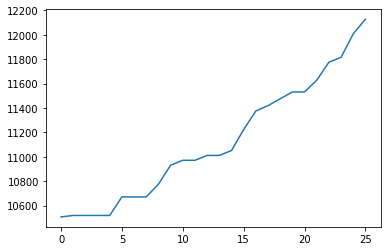

In [270]:
x = df['Interval'].values
y = df['Busyness_/home'].values
x, y

from matplotlib import pyplot
import numpy as np

pyplot.plot(y)
print("The baseline score is",np.mean(y))

In [271]:
x=x.reshape(-1,1)

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
model = SGDRegressor(max_iter=10000, tol=1e-3)
model.fit(X_train,y_train)
print("The predicted value is ",model.predict(X_test)[0])
print("==================================")
print("The actual value is",y_test[0])
print("Model score",model.score(X_test,y_test)*100)
    

The predicted value is  10677.541325578051
The actual value is 10776.0
Model score 91.4043259954301


In [274]:
from sklearn import linear_model
model = linear_model.LinearRegression().fit(X_train, y_train)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [276]:
print("The predicted value is ",model.predict(X_test)[0])
print("==================================")
print("The actual value is",y_test[0])
print("Model score",model.score(X_test,y_test)*100)
model.score(X_test,y_test)*100

print("future prediction")
model.predict([[35.0]])

The predicted value is  10758.600612654483
The actual value is 10776.0
Model score 97.81436493332187
future prediction


array([13589.87937044])

In [ ]:
import _pickle
filename='model.sav'
_pickle.dump(model, open(filename, 'wb'))

X_train.shape

In [277]:
uni_data=df['Busyness_/home'].values
scaler = MinMaxScaler(feature_range=(0, 1))
u_data = scaler.fit_transform(uni_data.reshape(-1,1))

In [278]:
def timeseries_data(dataset, begin_index, end_index, lookback, target_size):
    data = []
    labels = []

    begin_index = begin_index + lookback

    for i in range(begin_index, end_index):
        indices = range(i-lookback, i)
        data.append(np.reshape(dataset[indices], (lookback, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)


x_train_uni, y_train_uni = timeseries_data(u_data, 0, 20,
                                           5,
                                           0)


In [279]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(8, input_shape=x_train_uni.shape[-2:]))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')

model.fit(x_train_uni, y_train_uni, epochs=100, batch_size=1)


Epoch 1/100
15/15 [==============================] - 2s 132ms/step - loss: 0.2273
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1504
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0948
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0682
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0706
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0664
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0556
Epoch 9/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0542
Epoch 10/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0491
Epoch 11/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 12/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0418
Epoch 13/100
15/15 [=============

In [280]:
test_data=[]
test_data.append(np.reshape(u_data[range(20,25)], (5, 1)))
t=np.array(test_data)
predict = model.predict(t)
ytest = scaler.inverse_transform(predict)
print("testing data")
print("==============================")
print(scaler.inverse_transform(u_data[range(20,25)]))
print("predicted value",ytest)
print("actual value",scaler.inverse_transform((u_data[25]).reshape(-1,1)))

testing data
[[11532.]
 [11628.]
 [11776.]
 [11816.]
 [12008.]]
predicted value [[12066.142]]
actual value [[12128.]]
